


Team X - __Ariel Mordetzki__ and __Mateo Stipaničić__

Universidad de Montevideo: Prof. Sebastián García Parra

_24th September 2022_  

# Table of Contents

__Section 1__
1. Import libraries and dataset.
2. Data exploration and understanding.
    - Overall analysis of dataset.
    - Feature review.
     
__Section 2__
1. Pr



___

# Section 1


___

## 1.1. Import libraries and dataset

In [16]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Dataset
wines_df = pd.read_csv('dataset-lab1.csv')

___ 

## 1.2. Data exploration and understanding

> __In-depth analysis of given dataset__: In this section, we will analyze each feature's statistical properties, as well as the relevant relationships between them.


### Overall analysis of dataset

In [3]:
# Show dataset format with few sample wines
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Print dataset size
wines_df.shape

(1591, 12)

The dataset is composed of 11 features and 1 target ('quality'), with a sample size of 1591 wines.

In [5]:
# Consider data type
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1591 non-null   float64
 1   volatile acidity      1591 non-null   float64
 2   citric acid           1591 non-null   float64
 3   residual sugar        1591 non-null   float64
 4   chlorides             1591 non-null   float64
 5   free sulfur dioxide   1591 non-null   float64
 6   total sulfur dioxide  1591 non-null   float64
 7   density               1591 non-null   float64
 8   pH                    1591 non-null   float64
 9   sulphates             1591 non-null   float64
 10  alcohol               1591 non-null   float64
 11  quality               1591 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.3 KB


In [6]:
# Check null values
wines_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Confirming there are no null values, which might indicate good data quality (not in terms of bias, rather in a sense of completeness).

In [7]:
# Check unique values for target variable
wines_df['quality'].unique()

array([ 5,  6,  7, 15,  4, 14,  8, 16,  3], dtype=int64)

 Unique values analysis shows no sample wines of quality 9, for example. Also, certain wines were evaluated with quality [14,15,16], which certainly raises concerns on the data quality.

In [8]:
# Filtering outliers due to unsenseful data
wines_filter1 = wines_df[wines_df['quality'] <= 10]

# Instead, we could have 
# wines_filter1 = wines_df['quality'].quantile(0.95)

Wine quality measurement ranges from 0 to 10. Unique values confirmation provides input on data that is out of that range, thus, we decide to treat these cases as __data errors__, regarding them as outliers. A wine quality beyond 10 does not make any business-wise sense. We work now with variable __wines_filter1__.

In [9]:
# Break down dataset in percentiles
wines_filter1.describe(percentiles = [0.25,0.50,0.75])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000
mean,8.324559,0.527365,0.271770,2.539830,0.087509,15.867758,46.478589,0.996751,3.310838,0.658174,10.423331,5.639169
std,1.741589,0.178995,0.194921,1.413155,0.047148,10.434004,32.844095,0.001887,0.154569,0.169476,1.064751,0.807278
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.422500,2.600000,0.090000,21.000000,62.000000,0.997842,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This description gives deeper statistical insight of the data.

In [10]:
# Target variable count
wines_filter1['quality'].value_counts()

5    676
6    634
7    199
4     51
8     18
3     10
Name: quality, dtype: int64

Dataset seems to be __unbalanced__: the vast majority of samples are of quality 5 and 6. Also, there are no samples of, for example, a wine of quality 2, 9, even 10. 

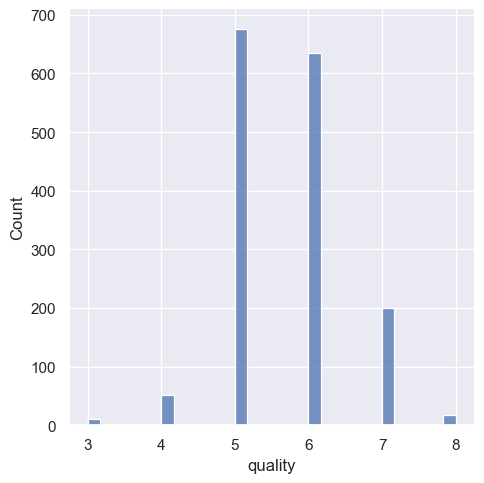

In [11]:
# Target variable distribution
sns.set(rc={'figure.figsize':(11,9)}) # sets image size
sns.displot(wines_filter1['quality'])

### Feature review

- Estudiar frecuencias (histograma) por atributo
- Boxplot for outliers para cada atributo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6272\2749768678.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), square=True, ax=ax, annot=True)


<AxesSubplot:>

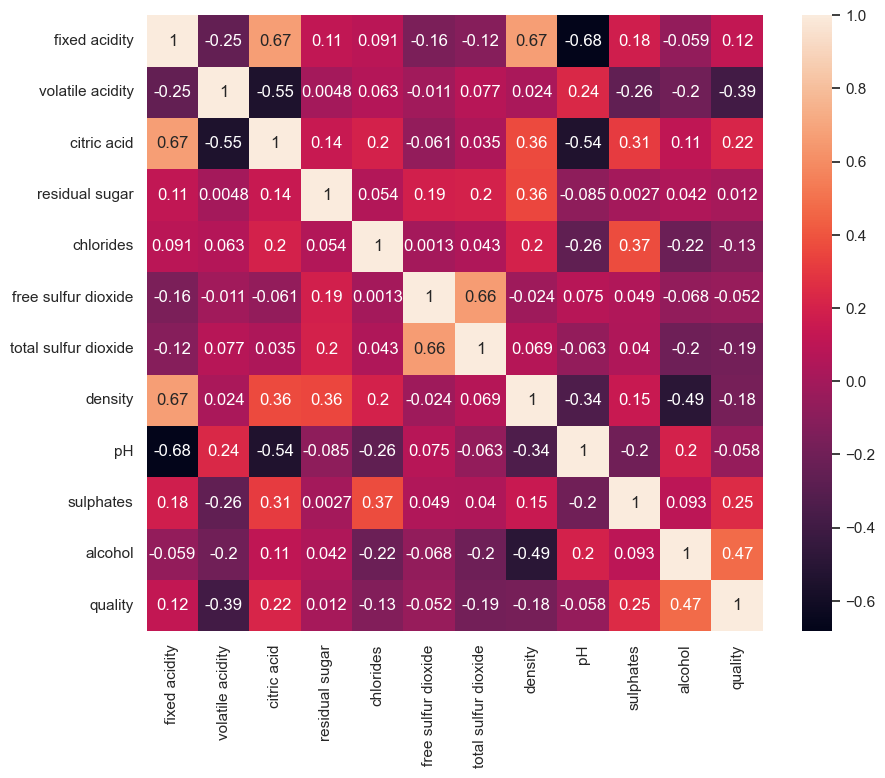

In [21]:
# Presenting correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
correlation = wines_filter1.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), square=True, ax=ax, annot=True)


We analyze two cases:
- Features strongly correlated between each other.
- Features weakly correlated with the target.

We thus check first for features weakly correlated with the target variable and decide whether to remove them in accordance to their correlation with other features (if it is correlated to other feature, then that first feature does not add relevance: we freely remove it). Therefore, from strongly correlated features, we keep those which correlate with the target in a senseful way.

In [20]:
# Removing unwanted features
wines_filter2 = wines_filter1.drop(['pH', 'free sulfur dioxide', 'residual sugar'], axis = 1)

We remove __pH__ because it is weakly correlated with quality ($-0.058$) and we do so safely, since __pH__ is strongly correlated with __fixed acidity__ ($-0.68$), and we chose not to remove this latter feature because it is sufficiently correlated with the target variable ($0.12$). Thus, we are certain we are not losing valuable relationships/information between data.

Likewise, we will not consider in this problem __free sulfur dioxide__ based in analogus reasoning.

Although rather weakly correlated with __density__, __residual sugar__ is also removed due to its low correlation with the target variable ($0.012$).

We considered dropping __density__ or __fixed acidity__ due to their strong correlation between each other ($0.67$); however, since __pH__ was already removed from the feature outline, we decided to keep both in order to ensure sufficient dimensions in the problem.
___

# Section 2
___

## 2.1. Data preparation

> This division into testing and training will be used for the entire modelling, ensuring we are always measuring in regards to the same data (methodological step). 

In [29]:
# Divide dataset into training and testing samples
from sklearn.model_selection import train_test_split
x = wines_filter2.loc[:,wines_filter2.columns != 'quality'] # features
y = wines_filter2 ['quality'] # target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44) # split

## 2.2. Linear regression

> __Model definition__: Linear regression prediction for wine quality based on features.

In [63]:
# Importing model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Creating object "model"
model = LinearRegression()

# Feed training dataset into model
model.fit(x_train, y_train)

# Result of the model
coef = pd.DataFrame(model.coef_, x.columns)
coef.columns = ['LR coeffecients:']
coef

,LR coeffecients:
fixed acidity,0.057404
volatile acidity,-1.003301
citric acid,-0.191143
chlorides,-1.798257
total sulfur dioxide,-0.002038
density,-28.038129
sulphates,0.998005
alcohol,0.261712


This means that our result is a hiperplane of formula:

* $x_1 = $ fixed acidity
* $x_2 = $ volatile acidity
* $x_3 = $ citric acid
* $x_4 = $ chlorides
* $x_5 = $ total sulfur dioxide
* $x_6 = $ density
* $x_7 = $ sulphates
* $x_8 = $ alcohol

$ Quality = f(x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8) = 0.1x_1 - 1x_2 - 0.2x_3 - 1.8x_4 - 0.0x_5 - 28x_6 + 1.0x_7 + 0.3x_8 $

In [38]:
# Test set prediction
y_pred = model.predict(x_test)

# Root mean squared error from testing dataset
test_rms = (metrics.mean_squared_error(y_pred, y_test))**0.5
print('Mean quadratic error: \n' + str(test_rms))


Mean quadratic error: 
0.661013499844389


In [41]:
train_pred = model.predict(x_train)
print(metrics.mean_squared_error(train_pred, y_train))

0.41760793118947764


In [42]:
predicted_quality = np.round(y_pred)
print(predicted_quality)

[5. 5. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6.
 5. 6. 6. 6. 5. 7. 6. 6. 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 7. 6. 5. 6. 5. 5.
 6. 6. 5. 7. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 7. 5. 7. 5. 6. 6. 5. 6. 5. 6.
 5. 5. 6. 6. 5. 5. 5. 6. 6. 5. 5. 6. 5. 6. 6. 7. 6. 5. 5. 5. 6. 6. 6. 6.
 6. 5. 7. 5. 6. 6. 6. 6. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 6.
 5. 6. 5. 5. 5. 6. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5. 5. 7. 5. 6. 6. 5. 7. 5.
 6. 5. 6. 5. 4. 6. 7. 6. 6. 6. 6. 5. 6. 6. 7. 6. 6. 5. 6. 5. 5. 6. 5. 6.
 5. 6. 5. 6. 5. 5. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 5. 5. 6. 5. 6. 6.
 6. 6. 6. 7. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 6. 5. 6. 6. 6. 6. 6. 7. 5.
 5. 6. 5. 6. 7. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 5. 5. 5. 5. 6. 5. 6. 6. 6.
 6. 5. 6. 6. 6. 6. 7. 6. 5. 5. 5. 6. 5. 6. 5. 6. 5. 7. 5. 5. 5. 6. 5. 5.
 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 5. 6. 5. 6. 5. 6. 5. 5. 5. 5. 6. 6. 6. 5.
 5. 5. 6. 6. 6. 6. 5. 6. 6. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6. 5. 6. 6. 6. 6.
 5. 6. 6. 5. 6. 5.]
